Zafrin Dhali <br> 
A121222669<br> 
Cogs 118A<br> 
HW 1<br> 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Q1 Parabola

### Original Data

In [2]:
X_and_Y = np.load('hw4-q1-parabola.npy')
X = X_and_Y[:, 0]  # Shape: (300,)
Y = X_and_Y[:, 1]  # Shape: (300,)
print (X.shape, Y.shape)
X_OG=X.copy()

(300,) (300,)


In [3]:
X=X.reshape(-1,1)

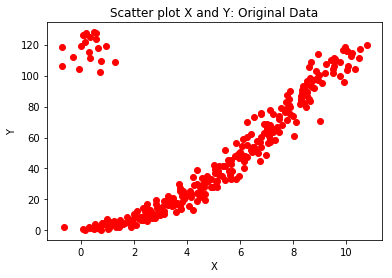

In [4]:
plt.plot(X, Y, 'ro')
plt.title("Scatter plot X and Y: Original Data")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [5]:
x_ones=np.ones((X.shape))
x_square=np.square(X)

In [6]:
print ([i.shape for i in [Y ,x_ones, X, x_square]])

[(300,), (300, 1), (300, 1), (300, 1)]


### 1.1 Parabola Estimation with L2 Norm 

In [7]:
#y=w1*x1+w2*x2 + w3
X=np.matrix(np.hstack(((x_ones, X, x_square))))

In [8]:
W = X.T.dot(X).I.dot(X.T).dot(Y)

In [9]:
w0, w1, w2 = np.array(W).reshape(-1)
print('Y = {:.2f} + {:.2f}*X1 + {:.2f}*X2'.format(w0, w1, w2))

Y = 51.07 + -16.06*X1 + 2.36*X2


# Scatterplot 1.1 (Closed form solution) 

In [2]:
x=np.linspace((X_OG.min()), 10)
plt.plot(X_OG, Y, 'ro')
plt.plot(x, 51.07 + -16.06*x + 2.36*x**2, ["g" for i in y_train ==-1, else "r"])
plt.title("Scatter plot X and Y: With L2 Closed parabola estimation")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

SyntaxError: invalid syntax (<ipython-input-2-2600117f2840>, line 3)

### 1.2 Parabola Estimation with L1 Norm (Gradient Descent)

In [11]:
print ([i.shape for i in [Y ,X, W]])

[(300,), (300, 3), (1, 3)]


In [12]:
#ORIGINAL WORKS
def g_prime_W(X, Y, W):
    #sign(f(W))*df(W)
    A=(X.dot(W)-Y).T
    A=np.sign(A)
    return (A.dot(X)).T

In [13]:
W = np.matrix(np.zeros((3,1)))
Y = Y.reshape(-1, 1)
iter_length= 30000
learning_rate= 0.000001
W_diff=.00001
print(X.shape, Y.shape, W.shape)

#while True:
for i in range(iter_length):
    grad = g_prime_W(X, Y, W)
    W_new = W - learning_rate * grad
    if np.linalg.norm(W_new - W, ord = 1) < W_diff:
        print(i)
        break
    W = W_new

w0, w1, w2 = np.array(W).reshape(-1)
print('Y = {:.2f} + {:.2f}*X1 + {:.2f}*X2'.format(w0, w1, w2))

(300, 3) (300, 1) (3, 1)
Y = 0.98 + 1.45*X1 + 1.03*X2


### 1.3 Parabola Estimation with L1 and L2 Norm (Gradient Descent)

In [14]:
# l1+l2 gradient descent
#l2 gradient function
def g_prime_W_l2(X, Y, W):
    return 2*X.T.dot(X).dot(W) - 2*X.T.dot(Y)

In [15]:
#l1 gradient function
def g_prime_W_l1(X, Y, W):
    #sign(f(W))*df(W)
    A=(X.dot(W)-Y).T
    A=np.sign(A)
    return (A.dot(X)).T

In [16]:
W = np.matrix(np.zeros((3,1)))
Y = Y.reshape(-1, 1)
iter_length= 30000
learning_rate= 0.000001
W_diff=.00001
print(X.shape, Y.shape, W.shape)
def grad_descent(alpha,X, Y, W):
    #while True:
    for i in range(iter_length):
        #prod=(g_prime_W_l1(X, Y, W).dot(learning_rate))
        #change_=np.sum(prod + g_prime_W_l2(X, Y, W))
        change_=(alpha*g_prime_W_l2(X, Y, W))+ (1-alpha)*(g_prime_W_l2(X, Y, W))
        #print (change_)
        W_new = W - learning_rate*change_
        if np.linalg.norm(W_new - W, ord = 1) <= W_diff:
            #print(i)
            break
        W = W_new
    w0, w1, w2 = np.array(W).reshape(-1)
    print('for alpha ={:.2f} Y = {:.2f} + {:.2f}*X1 + {:.2f}*X2'.format(alpha, w0, w1, w2))
    return alpha, w0, w1, w2

(300, 3) (300, 1) (3, 1)


In [17]:
alpha, w0, w1, w2=grad_descent(.3, X, Y, W)
alpha, w0, w1, w2=grad_descent(.5, X, Y, W)
alpha, w0, w1, w2=grad_descent(.7, X, Y, W)

for alpha =0.30 Y = 44.96 + -13.62*X1 + 2.16*X2
for alpha =0.50 Y = 44.96 + -13.62*X1 + 2.16*X2
for alpha =0.70 Y = 44.96 + -13.62*X1 + 2.16*X2


### 1.4 Comparison (Visualization)

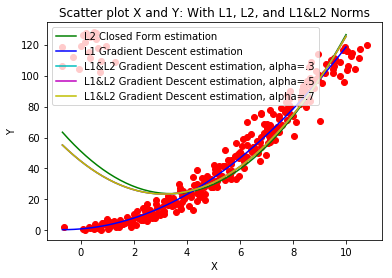

In [18]:
x=np.linspace((X_OG.min()), 10)
plt.plot(X_OG, Y, 'ro')
plt.plot(x, 51.07 + -16.06*x + 2.36*x**2, 'g', label="L2 Closed Form estimation")
plt.plot(x, 0.98 + 1.45*x + 1.03*x**2, 'b', label="L1 Gradient Descent estimation")
plt.plot(x, 44.67 + -13.53*x + 2.16*x**2, 'c', label="L1&L2 Gradient Descent estimation, alpha=.3")
plt.plot(x, 44.67 + -13.53*x + 2.16*x**2, 'm', label="L1&L2 Gradient Descent estimation, alpha=.5")
plt.plot(x, 44.67 + -13.53*x + 2.16*x**2, 'y', label="L1&L2 Gradient Descent estimation, alpha=.7")
plt.title("Scatter plot X and Y: With L1, L2, and L1&L2 Norms")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

Compare the result from above three subsections (1.1-1.3) and plot all curves in one figure
along with scatter graph of data. Try to explain the reason to  <br>(1) the position of each curve
compared to the position of valid data points and outliers <br> (2) difference between L2 curve
and L1 curve <br> (3) similarity among L2 curve and L1 + L2 curve <br>

(1) In the fits shown above, it can be seen that the l1 norm gradient descent fitted the data trend best, while the other estimations put a high cost on the outlier points, causing the fit to look more parabolic than exponential. The l1 fit puts a higher cost on the points that are closer together than the points that are far away. As such, the outliers are avoided adn the trend is fitted well. <br/>
<br/>
(2) The difference between the l1 and l2 fit is that the l2 from tries to fit the outlier points while the l1 norm does not. While the l1 form is a better fit of the trend, l2 solutions are stable solutions that can be solved in closed form, guaranteeing one solution. In l1 estimations, the solution is robust but there may be other solutions. It just provides a very good, simple model to begin with. <br/> 
<br/>
(3) The L2 curve looks very similiar to the L1+L2 curves because they all have the L2 term that puts a high cost on outliers. However, since the L1+L2 estimation combines the L1 cost that lowers the cost on outliers, the final line for L1+L2 fit is still parabolic and just below that of the l2 curve. For the L1+L2 fit, the L2 cost on the outliers overpowers the low cost put on the outliers by the L1 cost. 

## Q4 Logistic Regression

### Original Data

In [19]:
import numpy as np
from numpy.linalg import inv

from tqdm import *
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

# ---- set the figure size
plt.rcParams['figure.figsize'] = 8,8

# ---- load the data Q3_data.txt
file_path = 'Q4_data.txt'

data = np.genfromtxt(file_path,dtype="f8,f8,f8,f8,S20",
delimiter=',',names=['x1','x2','x3','x4','class'])

# ---- split the data points into the training set and test set
train_data = np.concatenate((data[15:50],data[65:]))
test_data = np.concatenate((data[:15],data[50:65]))
X_train = np.vstack([np.array((1,x[0],x[1],x[2],x[3])) for x in train_data])
X_test = np.vstack([np.array((1,x[0],x[1],x[2],x[3])) for x in test_data])
num_train = len(X_train)
num_test = len(X_test)

print("number of training data is "+str(num_train))
print("number of testing data is "+str(num_test))

# ---- convert the class names into categorical labels.
le = LabelEncoder()
le.fit(data['class'])
y_train = le.transform(train_data['class']).reshape(num_train,1)
y_test = le.transform(test_data['class']).reshape(num_test,1)

# ---- initialize the weights and bias to 0
# ---- we absorb the bias into the weights
w = np.zeros((5,1))
n_iter = 1000
alpha = 0.01
train_err = []

number of training data is 70
number of testing data is 30


In [157]:
def sigmoid(expo):
    return (1/(1+np.exp(expo)))


def gradient(x, w, y):
    A=np.dot((-(2*y-1)),(1- probability(x,w,y)))
    B=np.multiply(A,x)
    return B



def probability(x,w,y):
    return (sigmoid(np.dot(((-(2*y-1)).T),((np.dot(w.T, x.T)).T))))



def return_class(x,w,y):
    B = [probability(x,w,y) >= .5]
    y_pred=B.astype(np.int)
   
    return y_pred


In [158]:
for i in range(n_iter):
    w_old=w
    w_new= w_old.T - (alpha* (gradient(X_train, w, y_train)).T)
    predicted=return_class(X_train, w, y_train)
    train_error= (abs(y_train- predicted).sum())/ len(y_train)
    print (train_error)

ValueError: operands could not be broadcast together with shapes (1,5) (5,70) 

In [156]:
probability(X_train,w,y_train)

array([[0.5]])

In [ ]:
np.multiply(-(2*y-1), 

In [47]:
(np.dot(w.T,X_train.T)).shape

(1, 70)

In [152]:
(alpha*gradient(X_train, w, y_train))

array([[ 0.005 ,  0.028 ,  0.015 ,  0.0205,  0.0065],
       [ 0.005 ,  0.0275,  0.0125,  0.02  ,  0.0065],
       [ 0.005 ,  0.0275,  0.013 ,  0.022 ,  0.006 ],
       [ 0.005 ,  0.0305,  0.015 ,  0.023 ,  0.007 ],
       [ 0.005 ,  0.029 ,  0.013 ,  0.02  ,  0.006 ],
       [ 0.005 ,  0.025 ,  0.0115,  0.0165,  0.005 ],
       [ 0.005 ,  0.028 ,  0.0135,  0.021 ,  0.0065],
       [ 0.005 ,  0.0285,  0.015 ,  0.021 ,  0.006 ],
       [ 0.005 ,  0.0285,  0.0145,  0.021 ,  0.0065],
       [ 0.005 ,  0.031 ,  0.0145,  0.0215,  0.0065],
       [ 0.005 ,  0.0255,  0.0125,  0.015 ,  0.0055],
       [ 0.005 ,  0.0285,  0.014 ,  0.0205,  0.0065],
       [ 0.005 ,  0.035 ,  0.016 ,  0.0235,  0.007 ],
       [ 0.005 ,  0.032 ,  0.016 ,  0.0225,  0.0075],
       [ 0.005 ,  0.0345,  0.0155,  0.0245,  0.0075],
       [ 0.005 ,  0.0275,  0.0115,  0.02  ,  0.0065],
       [ 0.005 ,  0.0325,  0.014 ,  0.023 ,  0.0075],
       [ 0.005 ,  0.0285,  0.014 ,  0.0225,  0.0065],
       [ 0.005 ,  0.0315,  0

In [99]:
np.dot(w.T, X_train.T)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.]])

### 4.2 Training with Training curve.

### 4.3 Decision Boundary (Equation & Plot)

### 4.4 Test (Report Accuracy)